In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stock_module as sm
import random
import os
import datetime
import time
import progressbar

PURPOSE: This work is to show the results of random walk on Istanbul Stock Echange Market.



In [2]:
os.chdir("/Users/mturan/Desktop/Scripts/stock_analysis")

In [3]:
os.getcwd()

'/Users/mturan/Desktop/Scripts/stock_analysis'

In [4]:
all_stock_value = pd.read_pickle("stocks_values")

In [183]:
def transform_stock_values(all_stock_value):
    """
    The function update all_stock_value by adding YEAR column
    """
    stocks = all_stock_value
    stocks["YEAR"] = stocks.HGDG_TARIH.dt.year
    stocks.index = stocks.HGDG_TARIH
    return stocks

In [184]:
stock_names = list(set(all_stock_value["HGDG_HS_KODU"]))

In [185]:
def get_random_stock(number_of_stock:int, stock_names:list):
    """
    The function returns stocks selected randomly
    Args:
        - number_of_stock (int) : how many stocks do you want to select randomly from the market
        - stock_names (list)     : list of stocks
    """
    return random.sample(stock_names, number_of_stock)[0]

In [186]:
get_random_stock(1, stock_names)

'ARMDA'

In [187]:
get_random_stock(3, stock_names)

'FORMT'

In [188]:
def get_stock_data(stock_name: str, all_stock_value):
    """
    The functions returns frame including values of specified stock
        - stock_name (str)  : enter the stock name you want
        - all_stock_value   : database
    """
    all_stock_value = all_stock_value.reset_index(drop=True)
    stock_values = all_stock_value.loc[all_stock_value["HGDG_HS_KODU"] == str(stock_name)]
    stock_values = stock_values.sort_values(by="HGDG_TARIH")
    stock_values = stock_values.reset_index(drop=True)
    return stock_values

In [189]:
get_stock_data("MGROS", all_stock_value)

,HGDG_HS_KODU,HGDG_TARIH,HGDG_KAPANIS,HGDG_AOF,HGDG_MIN,HGDG_MAX,HGDG_HACIM,END_ENDEKS_KODU,END_TARIH,END_SEANS,...,HG_MIN,HG_MAX,PD,PD_USD,HAO_PD,HAO_PD_USD,HG_HACIM,DOLAR_BAZLI_MIN,DOLAR_BAZLI_MAX,DOLAR_BAZLI_AOF
0,MGROS,2001-01-02,2.0816,2.090079,2.056770,2.155892,3107450.0,01,978382800000,2,...,83.00,85.00,7.711200e+08,1.150944e+09,3.70138e+08,5.52453e+08,1763318.0,3.0699,3.2178,3.1196
1,MGROS,2001-01-02,2.0816,2.090079,2.056770,2.155892,3107450.0,01,978382800000,2,...,83.00,85.00,7.711200e+08,1.150944e+09,3.70138e+08,5.52453e+08,1344132.0,3.0699,3.2178,3.1196
2,MGROS,2001-01-03,1.9576,2.010917,1.957649,2.081551,4944389.0,01,978469200000,2,...,79.00,82.00,7.252200e+08,1.087241e+09,3.48106e+08,5.21876e+08,2521671.0,2.9349,3.1206,3.0147
3,MGROS,2001-01-03,1.9576,2.010917,1.957649,2.081551,4944389.0,01,978469200000,2,...,79.00,82.00,7.252200e+08,1.087241e+09,3.48106e+08,5.21876e+08,2422718.0,2.9349,3.1206,3.0147
4,MGROS,2001-01-04,2.0320,2.058066,2.007210,2.106331,8056968.0,01,978555600000,2,...,81.00,84.00,7.527600e+08,1.123943e+09,3.61325e+08,5.39493e+08,4712174.0,2.9970,3.1450,3.0729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,MGROS,2020-05-18,32.9400,33.075000,32.780000,33.380000,138849606.0,01,1589749200000,2,...,32.78,33.38,5.963926e+09,8.678589e+08,2.32593e+09,3.38465e+08,138849606.0,4.7701,4.8574,4.8130
8578,MGROS,2020-05-20,34.2400,34.133000,32.920000,34.800000,584530643.0,01,1589922000000,2,...,32.92,34.80,6.199297e+09,9.121577e+08,2.41773e+09,3.55741e+08,584530643.0,4.8438,5.1204,5.0223
8579,MGROS,2020-05-21,34.2000,34.577000,34.020000,35.320000,237853052.0,01,1590008400000,2,...,34.02,35.32,6.192055e+09,9.105294e+08,2.4149e+09,3.55106e+08,237853052.0,5.0026,5.1937,5.0845
8580,MGROS,2020-05-22,34.2000,34.219000,33.960000,34.460000,86215456.0,01,1590094800000,2,...,33.96,34.46,6.192055e+09,9.100610e+08,2.4149e+09,3.54924e+08,86215456.0,4.9912,5.0647,5.0292


In [190]:
def get_random_day_in_specified_year(year:int, dates:list):
    """
    The function returns date selected randomly
        - year (int)  : which year to be based
        - 
    """
    if type(dates) != list:
        dates = list(dates)
    else:
        dates = dates
    return random.sample(dates, 1)

In [191]:
def get_random_series(start_year, end_year, all_stock_value, print_mode=True, stockName = "random", date = "non-random"):
    """
    The function returns wealth, frame, time period of the stock selected randomly or intentionally
    Args:
        - start_year      : Year (4 digits) if we want to select randomly or "dd-mm-yyyy" if we want specific start data
        - end_year        : Year (4 digits) if we want to select randomly or "dd-mm-yyyy" if we want specific start data
        - all_stock_value : Database (already exist)
        - print_mode      : True (default) or False -> to print some outputs
        - stock_name      : "random" (default) or specific stock name (e.g. BIMAS)
        - date            : "non-random" (default) or "random". 
                             If non-random we can determine start_year and end_year "dd-mm-yyyy" or vice versa
    """
    all_stock_value = transform_stock_values(all_stock_value) # transform with the function
    stock_names = list(set(all_stock_value["HGDG_HS_KODU"]))  # stock names
    
    if stockName == "random":
        stock_name = get_random_stock(1, stock_names)             # choose a stock randomly
        if print_mode:
            print(f"randomly selected stock      : {stock_name}") # print randomly selected stock
    else:
        stock_name = stockName                                    # stock name is assigned based on your choice
        if print_mode:
            print(f"the stock you selected       : {stock_name}") # print selected stock
               
    stock = get_stock_data(str(stock_name), all_stock_value)  # get related stock part from whole universe
    
    
    if date == "random":
        stock_start_frame = stock.loc[stock.YEAR == start_year]   # to select start date randomly
        start = get_random_day_in_specified_year(start_year, stock_start_frame["HGDG_TARIH"])[0]
        start_str = start.strftime("%Y-%m-%d")
        if print_mode:
            print(f"randomly selected start date : {start_str}")

        end_start_frame = stock.loc[stock.YEAR == end_year]       # to select end date randomly
        end = get_random_day_in_specified_year(end_year, end_start_frame["HGDG_TARIH"])[0]
        end_str = end.strftime("%Y-%m-%d")
        if print_mode:
            print(f"randomly selected end date   : {end_str}")
            
    else:
        start_str = start_year
        start = datetime.datetime.strptime(start_year, "%d-%m-%Y")
        if print_mode:
            print(f"selected start date          : {start_year}")
            
        end_str = end_year
        end = datetime.datetime.strptime(end_year, "%d-%m-%Y")
        if print_mode:
            print(f"selected end date            : {end_year}")
             
    
    stock = stock.drop_duplicates(subset=["HGDG_TARIH"], keep="last") # remove duplicate values
    stock = stock.reset_index(drop=True)
    stock = stock.loc[(stock["HGDG_TARIH"]>= start) & (stock["HGDG_TARIH"] <= end)]
    
    stock = stock.dropna(subset=['HGDG_KAPANIS'])
    stock = stock[stock['HGDG_KAPANIS'] != 0]
    
    returns = pd.DataFrame(stock["HGDG_KAPANIS"].pct_change()) # calculate daily returns 
    returns.reset_index(drop = True)
    rets_columns = returns["HGDG_KAPANIS"]
    
    wealth_index = 1 * (1 + (rets_columns)).cumprod() # wealth index
    wealth = round(list(wealth_index)[-1],2)                   # daily final wealth index
    if print_mode:
        print(f"Wealth                       : {wealth}")
    
    results = {"stock name": stock_name,
              "wealth": wealth,
              "stock": stock,
              "start_date": start_str,
              "end_date": end_str} 
    
    return results

In [192]:
stock = get_random_series(2014, 2020, all_stock_value, print_mode=True, stockName="random", date="random")

randomly selected stock      : AKENR
randomly selected start date : 2014-10-27
randomly selected end date   : 2020-04-14
Wealth                       : 0.83


In [193]:
stock["stock name"]

'AKENR'

In [194]:
stock["wealth"]

0.83

In [195]:
stock["start_date"]

'2014-10-27'

In [196]:
stock["end_date"]

'2020-04-14'

In [197]:
stock = get_random_series("12-11-2014", "02-04-2020", all_stock_value, print_mode=True, stockName="RALYH", date="non-random")

the stock you selected       : RALYH
selected start date          : 12-11-2014
selected end date            : 02-04-2020
Wealth                       : 12.27


In [198]:
stock = get_random_series(2014, 2020, all_stock_value, print_mode=False, stockName="random", date="random")

In [199]:
stock = get_random_series(2014, 2020, all_stock_value, print_mode=True, stockName="MERIT", date="random")

the stock you selected       : MERIT
randomly selected start date : 2014-10-03
randomly selected end date   : 2020-01-06
Wealth                       : 4.08


In [200]:
def reverse_date_str(string):
    """
    The function reverse string date variable
    """
    return string[-2:] + "-" + string[5:7] + "-" + string[:4] 

In [201]:
string = '2014-09-03'
reverse_date_str(string)

'03-09-2014'

---
#### Rassal olarak portföy belirleme

In [202]:
def portfolio_random(all_stock_value, number_of_stocks: int, start_year, end_year):
    """
    The function returns portfolio randomly selected in terms of both dates and stocks
    Args:
        - all_stock_value        : database
        - number_of_stocks (int) : number of stock wanted to be involved in the portfolio
        - start_year             : start year (e.g. 2014)
        - end_year               : end year (e.g. 2017)
    """
    wealths = []
    stock_names = []
    counter = 0
    start_date = []
    end_date = []
    while number_of_stocks > counter:
        # print("-"*42)
        if len(start_date) == 0:
            try:
                stock = get_random_series(start_year, end_year, all_stock_value, print_mode=False, 
                                          stockName="random", date="random")
                wealths.append(stock["wealth"])
                stock_names.append(stock["stock name"])
                counter += 1
                start_date.append(reverse_date_str(stock["start_date"]))
                end_date.append(reverse_date_str(stock["end_date"]))
            except:
                counter = counter
        
        else:
            try:
                stock = get_random_series(start_date[0], end_date[0], all_stock_value, print_mode=False, 
                                          stockName="random", date="non-random")
                wealths.append(stock["wealth"])
                stock_names.append(stock["stock name"])
                counter += 1
                start_date.append(stock["start_date"])
                end_date.append(stock["end_date"])
            except:
                counter = counter  

    result = {"stock names": stock_names,
              "wealths": wealths,
             "average wealth": np.array(wealths).mean(),
             "dates": [start_date[0], end_date[0]]}
            
    return result 

In [203]:
random_move = portfolio_random(all_stock_value, 5, 2010, 2015)

In [204]:
random_move

{'stock names': ['MZHLD', 'BAGFS', 'AVOD', 'MAKTK', 'ATAGY'],
 'wealths': [0.88, 1.9, 0.5, 1.17, 2.58],
 'average wealth': 1.406,
 'dates': ['21-01-2010', '25-02-2015']}

In [205]:
random_move["stock names"]

['MZHLD', 'BAGFS', 'AVOD', 'MAKTK', 'ATAGY']

In [206]:
random_move["wealths"]

[0.88, 1.9, 0.5, 1.17, 2.58]

In [207]:
random_move["average wealth"]

1.406

In [208]:
random_move["dates"]

['21-01-2010', '25-02-2015']

---
#### Portföyü belirlediğimiz bir süre (gün) daha elimizde tutsak ne olurdu?

In [209]:
def portfolio_additional_time(portfolio_results, additional_days):
    """
    The function is to observe additional time after the function of portfolio_random.
    Args:
        - portfolio_results  : output of portfolio_random function
        - additional days    : how long do you want to carry that portfolio
    
    """
    stock_names  = portfolio_results["stock names"]
    additional_wealths = []
    for stock in stock_names:
        start_date = portfolio_results["dates"][1]
        end_date = datetime.datetime.strptime(start_date, "%d-%m-%Y")
        end_date = end_date + datetime.timedelta(days=additional_days)
        end_date = end_date.strftime("%d-%m-%Y")
        stock = get_random_series(start_date, end_date, all_stock_value, print_mode=True, stockName=stock, date="non-random")
        additional_wealths.append(stock["wealth"])
        
    results = {"names": stock_names,
              "wealths": additional_wealths} 
    
    return results

In [210]:
portfolio_additional_time(random_move, 180)

the stock you selected       : MZHLD
selected start date          : 25-02-2015
selected end date            : 24-08-2015
Wealth                       : 0.75
the stock you selected       : BAGFS
selected start date          : 25-02-2015
selected end date            : 24-08-2015
Wealth                       : 0.87
the stock you selected       : AVOD
selected start date          : 25-02-2015
selected end date            : 24-08-2015
Wealth                       : 0.94
the stock you selected       : MAKTK
selected start date          : 25-02-2015
selected end date            : 24-08-2015
Wealth                       : 0.68
the stock you selected       : ATAGY
selected start date          : 25-02-2015
selected end date            : 24-08-2015
Wealth                       : 1.17


{'names': ['MZHLD', 'BAGFS', 'AVOD', 'MAKTK', 'ATAGY'],
 'wealths': [0.75, 0.87, 0.94, 0.68, 1.17]}

---

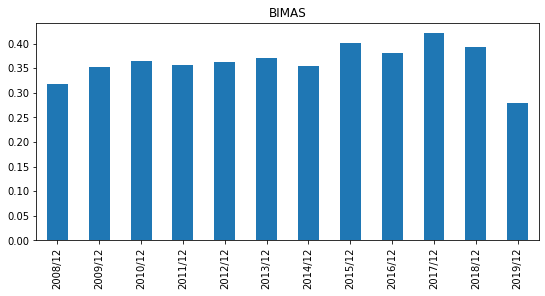

In [218]:
sm.plot_ratios("BIMAS", "networth_base", term = "12")

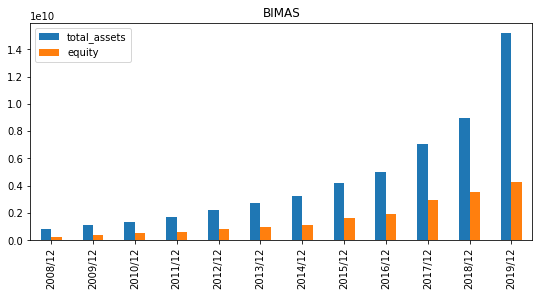

In [219]:
sm.plot_ratios_double("BIMAS", "total_assets", "equity", term = "12")

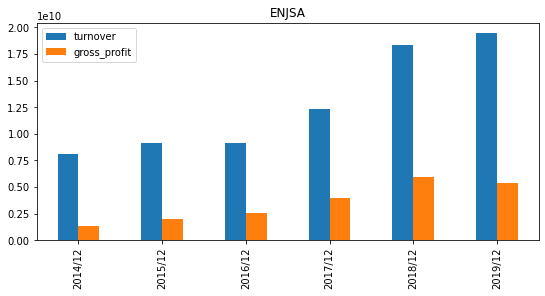

In [136]:
sm.plot_ratios_double("ENJSA", "turnover", "gross_profit", term = "12")

In [4]:
ratio_list = sm.ratio_list

In [5]:
ratio_list

['turnover',
 'total_assets',
 'equity',
 'gross_profit',
 'gross_profit_margin',
 'networth_base',
 'net_profit_margin',
 'net_profit',
 'ebitda',
 'ebitda_margin',
 'ebit',
 'ebit_margin',
 'net_debt',
 'netDebt_ebitda',
 'roe',
 'roa',
 'acid_test',
 'cash_ratio',
 'current_ratio',
 'asset_turnover',
 'debt_equity',
 'marketing_selling_general_to_gross']

In [6]:
terms = {"first_quarter": 3, "second_quarter": 6, "third_quarter": 9, "year_end": 12}

In [7]:
def update_financial_database():
    fs_frames = []
    for ratio in ratio_list:
        for key, value in terms.items():
            frame = sm.ratio_for_all_stocks(str(ratio), term = str(value))
            frame["ratio"] = ratio
            frame["term_type"] = key
            frame = frame.sort_index()
            fs_frames.append(frame)
    frames = pd.concat(fs_frames)

    frames.to_pickle("financials_database")
    
    return frames

In [8]:
update_financial_database()

,CEMAS,AFYON,BNTAS,MRGYO,ADEL,TKFEN,IHLAS,AKMGY,MAVI,BSOKE,...,INFO,GOZDE,CUSAN,CLEBI,AKFGY,UNYEC,TSGYO,GSDHO,ratio,term_type
2008/3,NaN,4.822848e+06,NaN,1.307310e+06,2.375118e+07,6.587700e+08,9.891977e+07,1.539626e+07,NaN,2.317877e+07,...,NaN,NaN,NaN,5.199946e+07,NaN,3.803712e+07,NaN,0.000000,turnover,first_quarter
2009/3,NaN,3.000749e+06,NaN,1.693288e+06,2.589664e+07,6.439850e+08,9.464217e+07,1.629302e+07,NaN,1.007295e+07,...,NaN,NaN,NaN,5.441021e+07,NaN,2.667004e+07,1.103494e+06,0.000000,turnover,first_quarter
2010/3,7.304473e+06,7.021200e+06,NaN,3.268365e+06,3.087205e+07,6.020130e+08,1.253251e+08,1.319872e+07,NaN,1.617611e+07,...,5.788676e+08,0.000000e+00,NaN,6.225972e+07,4.241876e+06,3.252227e+07,3.675478e+06,0.000000,turnover,first_quarter
2011/3,1.497835e+07,7.674840e+06,NaN,2.237747e+06,3.727248e+07,6.898470e+08,1.496458e+08,1.410174e+07,NaN,1.888656e+07,...,1.627899e+08,3.000000e+05,NaN,8.534830e+07,5.812725e+06,4.396289e+07,3.576199e+06,0.000000,turnover,first_quarter
2012/3,1.804739e+07,3.773981e+06,NaN,7.084209e+06,3.263664e+07,1.000179e+09,1.003227e+08,1.832332e+07,NaN,2.481192e+07,...,1.156615e+08,6.056588e+07,NaN,1.065368e+08,6.984414e+06,4.106137e+07,4.131667e+06,0.000000,turnover,first_quarter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015/12,2.364629e+00,2.838809e-01,0.529820,5.278808e-01,6.001058e-01,6.531327e-01,1.992763e+00,7.209404e-02,0.788628,3.652785e-01,...,8.036815e-01,2.523790e+00,0.477775,4.511525e-01,1.502494e-01,3.363788e-01,3.558712e-01,1.185683,marketing_selling_general_to_gross,year_end
2016/12,1.217947e+00,9.060247e-01,0.556267,1.305028e+00,5.753764e-01,4.519153e-01,6.109225e-01,7.218619e-02,0.787093,6.898198e-01,...,1.021471e+00,4.129562e-01,0.506815,6.306740e-01,1.696878e-01,2.985600e-01,3.312154e-01,0.918172,marketing_selling_general_to_gross,year_end
2017/12,1.291009e+00,1.570326e-01,0.888070,7.382608e-01,5.883953e-01,3.597262e-01,9.143975e-01,7.173086e-02,0.766111,9.886870e-01,...,9.680910e-01,1.566522e+00,0.766996,4.670196e-01,1.505168e-01,3.360294e-01,2.868361e-01,0.409055,marketing_selling_general_to_gross,year_end
2018/12,8.600137e-01,1.883705e-01,0.458230,3.694865e-01,5.882690e-01,2.887899e-01,6.090254e-01,7.780438e-02,0.736989,5.092122e-01,...,9.811483e-01,4.215686e+00,1.013056,4.085427e-01,1.619167e-01,4.778690e-01,2.690613e-01,0.311436,marketing_selling_general_to_gross,year_end


In [ ]:
def sampling(number_of_samples:int, sample_size:int, start_year:int, end_year:int):
    wealths = [] 
    for i in range(number_of_samples):   
        wealth = portfolio_random(all_stock_value, sample_size, start_year, end_year)["average wealth"]
        wealths.append(wealth)
    
    return wealths